## About

This mandatory assignment consist of two parts: one implementing a dense neural network for image classification, and one implementing convolutional layers. Information about the two parts is under their respective subheadings.

### Notebook set up

In [109]:
import random
import numpy as np
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def compare_result(expected, proposed, name):
    """Compares the expected result agains the proposed result and prints some information"""
    if proposed is None:
        print("The {} does not seem to be implemented yet.".format(name))
        return
    if np.allclose(expected, proposed):
        print("Correct {}!".format(name))
    else:
        print("This does not seem entirely correct.")
        print("This could mean that there is something wrong with the implementation of {}.".format(name))
        print("The difference between expected and proposed result is")
        print(expected - proposed)
        
def rel_error(x, y):
    """Returns the relative error between input x and y"""
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Part 1: Image classification with deep learning and dense neural networks

In this section we will implement a basic neural network for image classification. The network will be densly connected, with an arbitrary number of layers, and number of nodes in each layer. We shall implement a ReLu activation function, and use a softmax activation in the last layer. The error will be measured with a cross-entropy loss function, and the cost will be minimized using a stochastic gradient descent optimization routine.

### Additional notes

Most variables should be self-explanatory, but there are four important dictionaries worth mentioning, as they will control the data flow of the entire program

- `conf`: Contains all configurations of the program. These configurations will be passed around most functions, even though we most often will only need a couple of them; this is so that you are freer to experiment outside the boundaries of the program skeleton. They are set with some default values in the `config()` function in `dnn/main.py`.
- `params`: Contains all trainiable parameters, that is, all weight and bias arrays.
- `grads`: Contains the gradients of the respective trainable parameters.
- `features`: Contains input and output data, in addition to linear combination arrays `Z` and activation arrays `A`.

In [110]:
from dnn.model import initialization

# This dummy network has 784 input nodes, two hidden layers with 128 and 32 nodes, respectively, and
# an output layer with 10 nodes
conf = {'layer_dimensions': [784, 128, 32, 10]}

params = initialization(conf)

for key, value in sorted(params.items()):
    print("{}".format(key))
    print("    Shape = {}".format(value.shape))
    if key[0] == "W":
        n_lm1 = value.shape[0]
        print("    Mean: {0:>9.6f} vs {1:>9.6f} Abs diff: {2:>9.6f}".format(np.mean(value),
                                                                            0.0,
                                                                            np.abs(np.mean(value) - 0.0)))
        print("     Std: {0:>9.6f} vs {1:>9.6f} Abs diff: {2:>9.6f}".format(np.std(value),
                                                                            np.sqrt(2/n_lm1),
                                                                            np.abs(np.std(value) - np.sqrt(2/n_lm1))))
    else:
        print("     Min: {} vs {}".format(np.min(value), 0.0))
        print("     Max: {} vs {}".format(np.max(value), 0.0))

W_1
    Shape = (784, 128)
    Mean: -0.000005 vs  0.000000 Abs diff:  0.000005
     Std:  0.002556 vs  0.050508 Abs diff:  0.047952
W_2
    Shape = (128, 32)
    Mean:  0.000307 vs  0.000000 Abs diff:  0.000307
     Std:  0.015456 vs  0.125000 Abs diff:  0.109544
W_3
    Shape = (32, 10)
    Mean: -0.002665 vs  0.000000 Abs diff:  0.002665
     Std:  0.058242 vs  0.250000 Abs diff:  0.191758
b_1
    Shape = (128, 1)
     Min: 0.0 vs 0.0
     Max: 0.0 vs 0.0
b_2
    Shape = (32, 1)
     Min: 0.0 vs 0.0
     Max: 0.0 vs 0.0
b_3
    Shape = (10, 1)
     Min: 0.0 vs 0.0
     Max: 0.0 vs 0.0


### Task 1.2: Forward propagation

In this part we will implement a ReLu activation function and a softmax function, in addition to the rest of the forward propagation.

#### 1.2 a): ReLu activation function

The rectified linear unit:
$$
g(x) =
\begin{cases}
  x, &\quad x \ge 0 \\
  0, &\quad x < 0.
\end{cases}
$$

In [111]:
from dnn.model import activation
from dnn.tests import task_2a

input_Z, expected_A = task_2a()

A = activation(input_Z, 'relu')

compare_result(expected_A, A, "Relu activation")

Correct Relu activation!


#### 1.2 b): Softmax function

The $k$th element of a softmax function evaluated on a vector $x \in \mathbb{R}^n$ is given by
$$
s(x)_k = \frac{e^{x_k}}{\sum_{j=1}^n e^{x_j}}
$$

In [112]:
from dnn.model import softmax
from dnn.tests import task_2b

input_Z, expected_S = task_2b()

S = softmax(input_Z)

# Check the result
compare_result(expected_S, S, "softmax")

Correct softmax!


#### 1.2 c): Forward propagation

In this task we will implement the forward propagation, from data input to softmax output. 

The forward propagation should be able to handle an arbitrary number of layers and nodes, determined by the `conf['layer_dimensions']` parameter. It should also handle a batch of inputs.

In [113]:
from dnn.model import forward
from dnn.tests import task_2c

# We load the input and expected output
conf, X_batch, params, expected_Z_1, expected_A_1, expected_Z_2, expected_Y_proposed = task_2c()

Y_proposed, features = forward(conf, X_batch, params, is_training=True)

compare_result(expected_Z_1, features['Z_1'], "feature Z_1")
compare_result(expected_A_1, features['A_1'], "feature A_1")
compare_result(expected_Z_2, features['Z_2'], "feature Z_2")
compare_result(expected_Y_proposed, Y_proposed, "proposed Y")

Correct feature Z_1!
Correct feature A_1!
Correct feature Z_2!
Correct proposed Y!


### Task 1.3: Cross Entropy cost function

Given a batch of predicted outputs $\hat{Y} = (\hat{y}_1, \ldots, \hat{y}_m)$ and a batch of reference (one-hot encoded) outputs $\tilde{Y} = (\tilde{y}_1, \ldots, \tilde{y}_m)$, such that
$\hat{y}^{(i)}, \tilde{y}^{(i)} \in \mathbb{R}^n$ for $i = 1, \ldots, m$, the cross entropy cost is given by

$$
C(\hat{Y}, \tilde{Y}) = -\frac{1}{m}\sum_{i=1}^m\sum_{k=1}^{n} \tilde{y}_k^{(i)}\log \hat{y}_k^{(i)}.
$$

In [114]:
from dnn.model import cross_entropy_cost
from dnn.tests import task_3

# Generate some dummy input and corresponding expected output
Y_proposed, Y_batch, expected_cost_value, expected_num_correct = task_3()

cost_value, num_correct = cross_entropy_cost(Y_proposed, Y_batch)

compare_result(expected_cost_value, cost_value, "cost value")
compare_result(expected_num_correct, num_correct, "number of correct predictions")

Correct cost value!
Correct number of correct predictions!


### Task 1.4: Backward propagation

In this task, we compute the gradients of the trainable parameters with respect to the cost value. In order to compute them, we will need the following equations.

$$
\begin{aligned}
  \nabla_{W^{[l]}} \mathcal{C} &= \frac{1}{m} A^{[l-1]} \mathcal{J}_{z^{[l]}}{(\mathcal{C})}^\intercal \\
  \nabla_{b^{[l]}} \mathcal{C} &= \frac{1}{m}\left( \mathcal{J}_{z^{[l]}}{(\mathcal{C})} \right) \mathbf{1}(m) \\
  \mathcal{J}_{z^{[l]}}{(\mathcal{C})}&=g'(Z^{[l]})\circ \left(W^{[l+1]} \mathcal{J}_{z^{[l+1]}}{(\mathcal{C})}\right) \\
  \mathcal{J}_{z^{[L]}}{(\mathcal{C})} &= \hat{Y} - \tilde{Y}.
\end{aligned}
$$

#### 1.4 a): Derivative of the activation function

In order to compute the parameter gradients, we need a function to compute the derivative of the relu activation function. If we take some freedoms, we can use the Heaviside step-function as the derivative of the ReLu activation

$$
g'(x) =
\begin{cases}
  1, &\quad x \ge 0 \\
  0, &\quad x < 0.
\end{cases}
$$

In [115]:
from dnn.model import activation_derivative
from dnn.tests import task_4a

# Load dummy input and expected output
input_Z, expected_dg_dz = task_4a()

dg_dz = activation_derivative(input_Z, "relu")

# Compare result with the expected
compare_result(expected_dg_dz, dg_dz, "activation function derivative")

Correct activation function derivative!


#### 1.4 b): Backward propagation

In [116]:
from dnn.model import backward
from dnn.tests import task_4b

# Load dummy input and expected output
(conf, Y_proposed, Y_batch, params, features,
 expected_grad_W_1, expected_grad_b_1, expected_grad_W_2, expected_grad_b_2) = task_4b()

grad_params = backward(conf, Y_proposed, Y_batch, params, features)

# Check implementation
compare_result(expected_grad_W_1, grad_params['grad_W_1'], "gradient of cost w.r.t. W_1")
compare_result(expected_grad_b_1, grad_params['grad_b_1'], "gradient of cost w.r.t. b_1")
compare_result(expected_grad_W_2, grad_params['grad_W_2'], "gradient of cost w.r.t. W_2")
compare_result(expected_grad_b_2, grad_params['grad_b_2'], "gradient of cost w.r.t. b_2")

Correct gradient of cost w.r.t. W_1!
Correct gradient of cost w.r.t. b_1!
Correct gradient of cost w.r.t. W_2!
Correct gradient of cost w.r.t. b_2!


### Task 1.5: Update parameters

Given some learning rate $\lambda \in \mathbb{R}$, the gradient descent update is given by

$$
\begin{aligned}
  w_{jk}^{[l]} &\gets w_{jk}^{[l]} - \lambda \frac{\partial \mathcal{C}}{\partial w_{jk}^{[l]}} \\
  b_k^{[l]}    &\gets b_k^{[l]} - \lambda \frac{\partial \mathcal{C}}{\partial b_k^{[l]}}
  \end{aligned}
$$

for all

$$
\begin{cases}
  j &= 1, \ldots, n^{[l-1]} \\
  k &= 1, \ldots, n^{[l]} \\
  l &= 1, \ldots, L
\end{cases}
$$

In [117]:
from dnn.model import gradient_descent_update
from dnn.tests import task_5

# Load dummy input and expected output
(conf, params, grad_params,
 expected_updated_W_1, expected_updated_b_1, expected_updated_W_2, expected_updated_b_2) = task_5()

updated_params = gradient_descent_update(conf, params, grad_params)

# Check results
compare_result(expected_updated_W_1, updated_params['W_1'], "update of W_1")
compare_result(expected_updated_b_1, updated_params['b_1'], "update of b_1")
compare_result(expected_updated_W_2, updated_params['W_2'], "update of W_2")
compare_result(expected_updated_b_2, updated_params['b_2'], "update of b_2")

Correct update of W_1!
Correct update of b_1!
Correct update of W_2!
Correct update of b_2!


### Task 1.6: Putting everything together

Now it is time to test our implementation on some data. In `dnn/import_data.py` there is automated scripts for importing the following datasets

- MNIST
- CIFAR10
- SVHN

These are chosen because they contain small images, and therefore easy to experiment with.

In [118]:
import sys
import os

src_dir = os.path.join(os.getcwd(), "dnn")
if src_dir not in sys.path:
    sys.path.append(src_dir)

Loading MNIST data from  /tmp/data/mnist
Run training
Number of training examples in one epoch:  55000
Start training iteration
Terminating training after 2000 steps


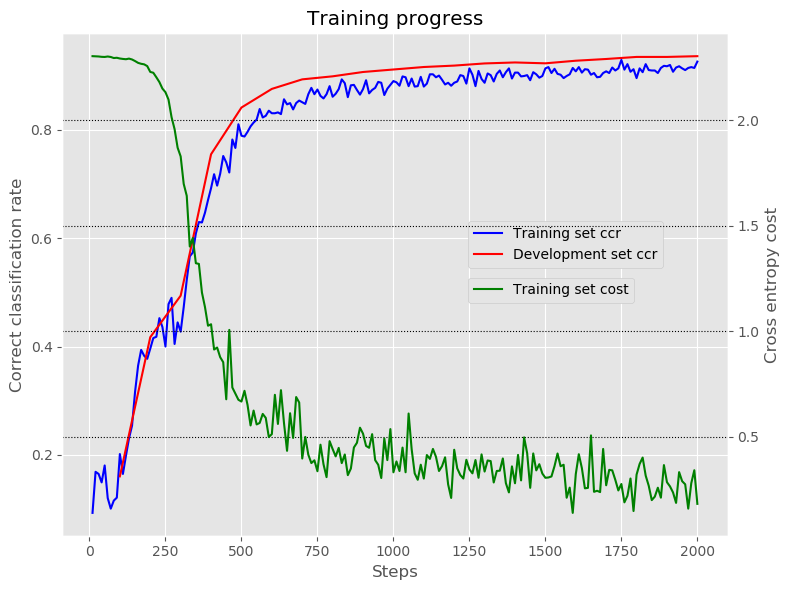

Evaluating train set
CCR = 50561.0 / 55000 = 0.9193
Evaluating development set
CCR = 4679.0 /  5000 = 0.9358
Evaluating test set
CCR = 9196.0 / 10000 = 0.9196


In [132]:
# MNIST
import dnn.main as main
import dnn.run as run

# Import config, and do changes if you want to
conf = main.config()
conf['dataset'] = 'mnist'
conf['max_steps'] = 2000
conf['batch_size'] = 128
conf['learning_rate'] = 0.05

X_train, Y_train, X_devel, Y_devel, X_test, Y_test = main.get_data(conf)
params, train_progress, devel_progress = run.train(conf, X_train, Y_train, X_devel, Y_devel)
main.plot_progress(train_progress, devel_progress)

print("Evaluating train set")
num_correct, num_evaluated = run.evaluate(conf, params, X_train, Y_train)
print("CCR = {0:>5} / {1:>5} = {2:>6.4f}".format(num_correct, num_evaluated,
                                                 num_correct/num_evaluated))
print("Evaluating development set")
num_correct, num_evaluated = run.evaluate(conf, params, X_devel, Y_devel)
print("CCR = {0:>5} / {1:>5} = {2:>6.4f}".format(num_correct, num_evaluated,
                                                 num_correct/num_evaluated))
print("Evaluating test set")
num_correct, num_evaluated = run.evaluate(conf, params, X_test, Y_test)
print("CCR = {0:>5} / {1:>5} = {2:>6.4f}".format(num_correct, num_evaluated,
                                                 num_correct/num_evaluated))

Loading cifar10 data from /tmp/data/cifar10
Extracting tar file: /tmp/data/cifar10/cifar-10-python.tar.gz
Run training
Number of training examples in one epoch:  45000
Start training iteration
Terminating training after 10000 steps


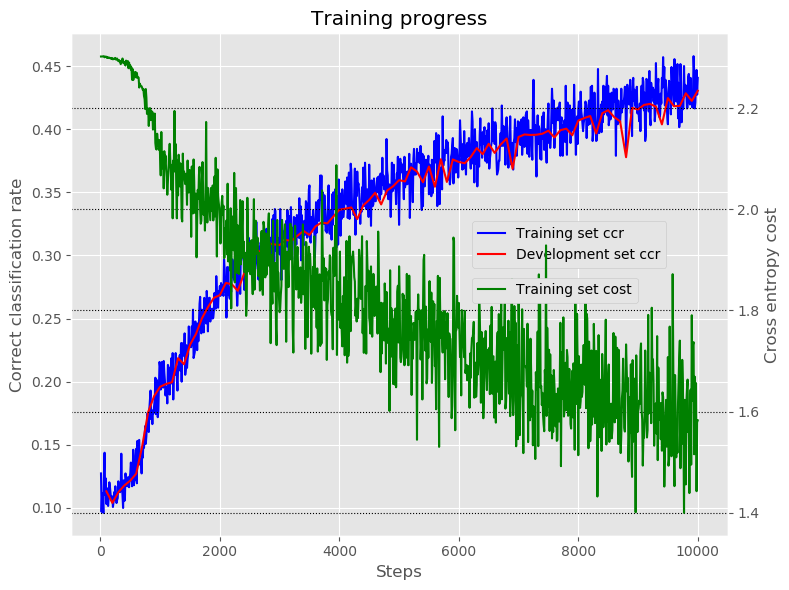

Evaluating train set
CCR = 19828.0 / 45000 = 0.4406
Evaluating development set
CCR = 2152.0 /  5000 = 0.4304
Evaluating test set
CCR = 4358.0 / 10000 = 0.4358


In [133]:
# CIFAR10
import dnn.main as main
import dnn.run as run

# Import config, and do changes if you want to
conf = main.config()
conf['dataset'] = 'cifar10'
conf['max_steps'] = 10000
conf['batch_size'] = 128
conf['learning_rate'] = 1.0e-2

X_train, Y_train, X_devel, Y_devel, X_test, Y_test = main.get_data(conf)
params, train_progress, devel_progress = run.train(conf, X_train, Y_train, X_devel, Y_devel)
main.plot_progress(train_progress, devel_progress)

print("Evaluating train set")
num_correct, num_evaluated = run.evaluate(conf, params, X_train, Y_train)
print("CCR = {0:>5} / {1:>5} = {2:>6.4f}".format(num_correct, num_evaluated,
                                                 num_correct/num_evaluated))
print("Evaluating development set")
num_correct, num_evaluated = run.evaluate(conf, params, X_devel, Y_devel)
print("CCR = {0:>5} / {1:>5} = {2:>6.4f}".format(num_correct, num_evaluated,
                                                 num_correct/num_evaluated))
print("Evaluating test set")
num_correct, num_evaluated = run.evaluate(conf, params, X_test, Y_test)
print("CCR = {0:>5} / {1:>5} = {2:>6.4f}".format(num_correct, num_evaluated,
                                                 num_correct/num_evaluated))

Loading svhn data from /tmp/data/svhn
Run training
Number of training examples in one epoch:  68257
Start training iteration
Terminating training after 10000 steps


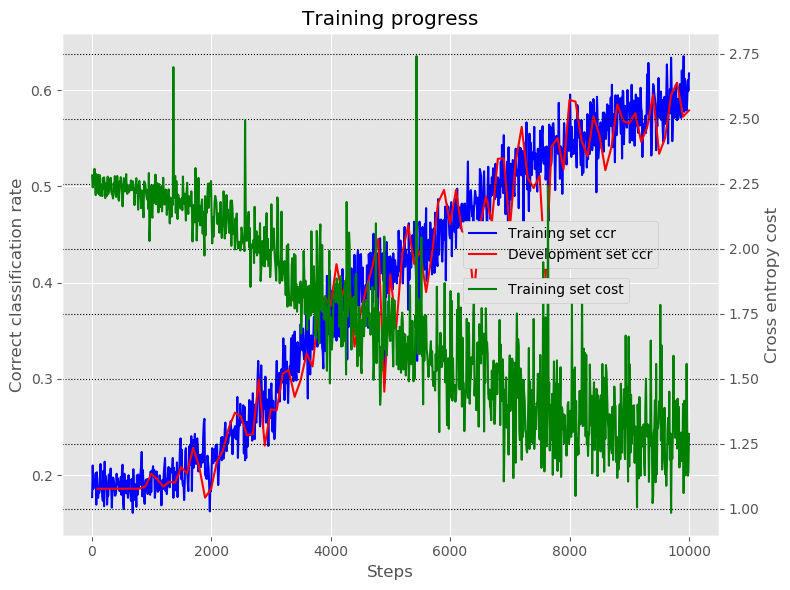

Evaluating train set
CCR = 39876.0 / 68257 = 0.5842
Evaluating development set
CCR = 2894.0 /  5000 = 0.5788
Evaluating test set
CCR = 14088.0 / 26032 = 0.5412


In [135]:
# SVHN
import dnn.main as main
import dnn.run as run

# Import config, and do changes if you want to
conf = main.config()
conf['dataset'] = 'svhn'
conf['max_steps'] = 10000
conf['batch_size'] = 128
conf['learning_rate'] = 0.15

X_train, Y_train, X_devel, Y_devel, X_test, Y_test = main.get_data(conf)
params, train_progress, devel_progress = run.train(conf, X_train, Y_train, X_devel, Y_devel)
main.plot_progress(train_progress, devel_progress)

print("Evaluating train set")
num_correct, num_evaluated = run.evaluate(conf, params, X_train, Y_train)
print("CCR = {0:>5} / {1:>5} = {2:>6.4f}".format(num_correct, num_evaluated,
                                                 num_correct/num_evaluated))
print("Evaluating development set")
num_correct, num_evaluated = run.evaluate(conf, params, X_devel, Y_devel)
print("CCR = {0:>5} / {1:>5} = {2:>6.4f}".format(num_correct, num_evaluated,
                                                 num_correct/num_evaluated))
print("Evaluating test set")
num_correct, num_evaluated = run.evaluate(conf, params, X_test, Y_test)
print("CCR = {0:>5} / {1:>5} = {2:>6.4f}".format(num_correct, num_evaluated,
                                                 num_correct/num_evaluated))

## Part 2: Implement convolutional layers

In this part, we will consider the computations involved between two convolutional layers. It consist of two tasks, where the first concerns the forward propagation and the second the backward propagation. In both cases, a small introduction will be presented, before the subtasks.

### Task 2.1:  Convolution --- basic forward pass

The core of a convolutional network is the convolution operation. In this task, we consider a simple convolution from a layer $x$ with shape $(M, C_x, H_x, W_x)$ to a layer $y$ with shape $(M, C_y, H_y, W_y)$ using a set of filters $w$ with shape $(N, C_w, H_w, W_w)$. More specifically, $x$ is convolved with $N$ 3D filters $w_j, j=1, \ldots, N$, each with shape $(C_w, H_w, W_w)$. 

#### 2.1 a) Basic case

As a first step we implement a forward convolution as is described above, with batch size and stride equal to one. It should, however, be generic over

- Input layer dimensions $(C_x, H_x, W_x)$
- Pad size
- Number of filters $N (= C_y)$
- Spatial filter dimensions $(H_w, W_w)$, but you can assume that both are equal to $2K + 1$

In [37]:
from cnn.conv_layers import conv_layer_forward

batch_size = 1
num_filters = 2

channels_x, height_x, width_x = 3, 4, 4
height_w, width_w = 3, 3

stride = 1
pad_size = 1

x_shape = (batch_size, channels_x, height_x, width_x)
w_shape = (num_filters, channels_x, height_w, width_w)

input_layer = np.linspace(-0.4, 0.3, num=np.prod(x_shape)).reshape(x_shape)
weight = np.linspace(-0.2, 0.3, num=np.prod(w_shape)).reshape(w_shape)
bias = np.linspace(-0.1, 0.2, num=num_filters)

output_layer = conv_layer_forward(input_layer, weight, bias, pad_size, stride)

correct_out = np.array(
    [[[[ 0.15470494,  0.28520674,  0.26826174,  0.14451626],   # y[0, 0, 0, :]
       [ 0.28745885,  0.47927338,  0.44816540,  0.25953031],   # y[0, 0, 1, :]
       [ 0.20956242,  0.35484143,  0.32373344,  0.17151746],   # y[0, 0, 2, :]
       [ 0.07288238,  0.14856283,  0.12403051,  0.03908872]],  # y[0, 0, 3, :]

      [[ 0.07425532,  0.04867523,  0.10001606,  0.15511441],   # y[0, 1, 0, :]
       [ 0.15335608,  0.17933360,  0.25065436,  0.26199920],   # y[0, 1, 1, :]
       [ 0.34860297,  0.46461662,  0.53593737,  0.44712967],   # y[0, 1, 2, :]
       [ 0.35662385,  0.45831794,  0.50207146,  0.41387796]]]] # y[0, 1, 3, :]
)

# Compare your output to ours
compare_result(output_layer, correct_out, "forward convolution")

Correct forward convolution!


#### 2.1 b) Adding stride

The spatial dimensions of the output layer will be

$$
\begin{align}
H_y &= 1 + \frac{H_x + 2P - H_w}{S} \\
W_y &= 1 + \frac{W_x + 2P - W_w}{S} \\
\end{align}
$$

where $P$ is the pad size and $S$ is the stride.

In [1]:
from cnn.conv_layers import conv_layer_forward

batch_size = 1
num_filters = 2

channels_x, height_x, width_x = 3, 5, 5
height_w, width_w = 3, 3

stride = 2
pad_size = 1

x_shape = (batch_size, channels_x, height_x, width_x)
w_shape = (num_filters, channels_x, height_w, width_w)

input_layer = np.linspace(-0.4, 0.3, num=np.prod(x_shape)).reshape(x_shape)
weight = np.linspace(-0.2, 0.3, num=np.prod(w_shape)).reshape(w_shape)
bias = np.linspace(-0.1, 0.2, num=num_filters)

output_layer = conv_layer_forward(input_layer, weight, bias, pad_size, stride)

correct_out = np.array(
    [[[[ 0.15976543,  0.28564763,  0.15193269],   # y[0, 0, 0, :]
       [ 0.24134370,  0.39155788,  0.21031871],   # y[0, 0, 1, :]
       [ 0.05787863,  0.11354156,  0.02434472]],  # y[0, 0, 2, :]

      [[ 0.04671086,  0.03112188,  0.12561958],   # y[0, 1, 0, :]
       [ 0.24704233,  0.34768995,  0.34612953],   # y[0, 1, 1, :]
       [ 0.37853136,  0.50957675,  0.43173891]]]] # y[0, 1, 2, :]
)

# Compare output
compare_result(output_layer, correct_out, "forward convolution")

NameError: name 'np' is not defined

#### 2.1 c) Adding multiple examples

In [38]:
from cnn.conv_layers import conv_layer_forward

batch_size = 2
num_filters = 2

channels_x, height_x, width_x = 3, 5, 5
height_w, width_w = 3, 3

stride = 2
pad_size = 1

x_shape = (batch_size, channels_x, height_x, width_x)
w_shape = (num_filters, channels_x, height_w, width_w)

input_layer = np.linspace(-0.4, 0.3, num=np.prod(x_shape)).reshape(x_shape)
weight = np.linspace(-0.2, 0.3, num=np.prod(w_shape)).reshape(w_shape)
bias = np.linspace(-0.1, 0.2, num=num_filters)

output_layer = conv_layer_forward(input_layer, weight, bias, pad_size, stride)

correct_out = np.array(
    [[[[ 0.17033051,  0.32060403,  0.18923389],   # y[0, 0, 0, :]
       [ 0.33279093,  0.56466886,  0.35157275],   # y[0, 0, 1, :]
       [ 0.18810941,  0.33769913,  0.19424845]],  # y[0, 0, 2, :]

      [[-0.35023427, -0.57793339, -0.28825123],   # y[0, 1, 0, :]
       [-0.43650753, -0.69081423, -0.35310624],   # y[0, 1, 1, :]
       [-0.11705711, -0.23774091, -0.06783842]]], # y[0, 1, 2, :]

     
     [[[-0.07697860, -0.08027605, -0.09796378],   # y[1, 0, 0, :]
       [-0.12792200, -0.17127517, -0.16897303],   # y[1, 0, 1, :]
       [-0.17886539, -0.24267950, -0.21261492]],  # y[1, 0, 2, :]

      [[ 0.47944789,  0.63667342,  0.50154236],   # y[1, 1, 0, :]
       [ 0.71826643,  0.99647208,  0.74183487],   # y[1, 1, 1, :]
       [ 0.59295935,  0.79736735,  0.60228948]]]] # y[1, 1, 2, :]
)

# Compare output
compare_result(output_layer, correct_out, "forward convolution")

Correct forward convolution!


### Task 2.2: Convolution --- basic backward pass

In this part we implement a backward pass in a convolution layer.

#### b

This is the simplest one, and we see that the scalar $\mathtt{b[j]}$ is involved in computing all spatial components of the channel $\mathtt{y[j, : , :]}$. Therefore

$$
\begin{align}
\frac{\partial L}{\partial \mathtt{b[j]}} &=
  \mathtt{\sum_p \sum_q} \frac{\partial L}{\partial \mathtt{y[j, p, q]}}
    \frac{\partial \mathtt{y[j, p, q]}}{\partial  \mathtt{b[j}]} \\
&= \mathtt{\sum_p \sum_q} \frac{\partial L}{\partial \mathtt{y[j, p, q]}}
\end{align}
$$

#### w

The case of $\mathtt{w[j, k, r, s]}$ is quite similar to $\mathtt{b[j]}$ in the sense that it is only involved in one channel $\mathtt{y[j, : , :]}$, but in this channel, it is involved in every spatial component, so

$$
\begin{align}
\frac{\partial L}{\partial \mathtt{w[j, k, r, s]}} &=
  \mathtt{\sum_p \sum_q} \frac{\partial L}{\partial \mathtt{y[j, p, q]}}
    \frac{\partial \mathtt{y[j, p, q]}}{\partial \mathtt{w[j, k, r, s]}} \\
&= \mathtt{\sum_j \sum_p \sum_q} \frac{\partial L}{\partial \mathtt{y[j, p, q]}} \mathtt{x[k, p+r, q+s]}
\end{align}
$$


#### 2.2 a) Basic case

As a first step we implement a backward convolution as is described above, with batch size and stride equal to one.
It should, however, be generic over

- Input layer dimensions $(C_x, H_x, W_x)$
- Pad size
- Number of filters $N (= C_y)$
- Spatial filter dimensions $(H_w, W_w)$, but you can assume that both are equal to $2K + 1$

In [107]:
from cnn.conv_layers import conv_layer_forward, conv_layer_backward, eval_numerical_gradient_array

np.random.seed(231)

batch_size = 1
num_filters = 2

channels_x, height_x, width_x = 3, 7, 7
height_w, width_w = 3, 3

stride = 1
pad_size = 1

input_layer = np.random.randn(batch_size, channels_x, height_x, width_x)
weight = np.random.randn(num_filters, channels_x, height_w, width_w)
bias = np.random.randn(num_filters,)
output_layer_gradient = np.random.randn(batch_size, num_filters, height_x, width_x)

numeric_input_layer_gradient = eval_numerical_gradient_array(
    lambda x: conv_layer_forward(x, weight, bias, pad_size, stride), input_layer, output_layer_gradient)
numeric_weight_gradient = eval_numerical_gradient_array(
    lambda w: conv_layer_forward(input_layer, w, bias, pad_size, stride), weight, output_layer_gradient)
numeric_bias_gradient = eval_numerical_gradient_array(
    lambda b: conv_layer_forward(input_layer, weight, b, pad_size, stride), bias, output_layer_gradient)

input_layer_gradient, weight_gradient, bias_gradient = conv_layer_backward(
    output_layer_gradient, input_layer, weight, bias, pad_size)

# Compare output
compare_result(bias_gradient, numeric_bias_gradient, "gradient of L wrt b")
compare_result(weight_gradient, numeric_weight_gradient, "gradient of L wrt w")
compare_result(input_layer_gradient, numeric_input_layer_gradient, "gradient of L wrt x")

Correct gradient of L wrt b!
Correct gradient of L wrt w!
Correct gradient of L wrt x!


#### 2.2 b) Multiple examples

Extend implementation to handle a batch size larger than one.

In [2]:
from cnn.conv_layers import conv_layer_forward, conv_layer_backward, eval_numerical_gradient_array

np.random.seed(231)

batch_size = 2
num_filters = 2

channels_x, height_x, width_x = 3, 7, 7
height_w, width_w = 3, 3

stride = 1
pad_size = 1

input_layer = np.random.randn(batch_size, channels_x, height_x, width_x)
weight = np.random.randn(num_filters, channels_x, height_w, width_w)
bias = np.random.randn(num_filters,)
output_layer_gradient = np.random.randn(batch_size, num_filters, height_x, width_x)

numeric_input_layer_gradient = eval_numerical_gradient_array(
    lambda x: conv_layer_forward(x, weight, bias, pad_size, stride), input_layer, output_layer_gradient)
numeric_weight_gradient = eval_numerical_gradient_array(
    lambda w: conv_layer_forward(input_layer, w, bias, pad_size, stride), weight, output_layer_gradient)
numeric_bias_gradient = eval_numerical_gradient_array(
    lambda b: conv_layer_forward(input_layer, weight, b, pad_size, stride), bias, output_layer_gradient)

input_layer_gradient, weight_gradient, bias_gradient = conv_layer_backward(
    output_layer_gradient, input_layer, weight, bias, pad_size)

# Compare output
compare_result(bias_gradient, numeric_bias_gradient, "gradient of L wrt b")
compare_result(weight_gradient, numeric_weight_gradient, "gradient of L wrt w")
compare_result(input_layer_gradient, numeric_input_layer_gradient, "gradient of L wrt x")

NameError: name 'np' is not defined